# Neural Networks Homework-4

## Mustafa Nazlıer - 15050111035 

In [1]:
import tensorflow
print(tensorflow.__version__)    # Checking tensor version 

2.4.1


In [2]:
from tensorflow.keras.datasets import mnist              #importing the dataset 

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()                  
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
from tensorflow.keras import Sequential           #importing sequential model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


## Sequential Model 1 - Model with no hidden layer

In [4]:
model1 = Sequential()                                 
model1.add(Flatten(input_shape=[28, 28]))                 #flattening the input
model1.add(Dense(10, activation="softmax"))               #output layer

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


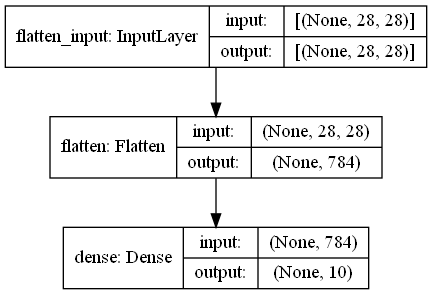

In [6]:
from tensorflow.keras.utils import plot_model
 
plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)        #sequential model diagram

In [7]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
Sequential_model_1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))    #Training it for 10 epochs

Epoch 1/10
1719/1719 [==============================] - 2s 730us/step - loss: 1.1663 - accuracy: 0.7034 - val_loss: 0.4976 - val_accuracy: 0.8772
Epoch 2/10
1719/1719 [==============================] - 1s 427us/step - loss: 0.4953 - accuracy: 0.8733 - val_loss: 0.4095 - val_accuracy: 0.8908
Epoch 3/10
1719/1719 [==============================] - 1s 462us/step - loss: 0.4221 - accuracy: 0.8865 - val_loss: 0.3733 - val_accuracy: 0.8994
Epoch 4/10
1719/1719 [==============================] - 1s 460us/step - loss: 0.3914 - accuracy: 0.8945 - val_loss: 0.3527 - val_accuracy: 0.9018
Epoch 5/10
1719/1719 [==============================] - 1s 464us/step - loss: 0.3736 - accuracy: 0.8980 - val_loss: 0.3388 - val_accuracy: 0.9078
Epoch 6/10
1719/1719 [==============================] - 1s 493us/step - loss: 0.3520 - accuracy: 0.9025 - val_loss: 0.3282 - val_accuracy: 0.9102
Epoch 7/10
1719/1719 [==============================] - 1s 503us/step - loss: 0.3429 - accuracy: 0.9040 - val_loss: 0.3212 -

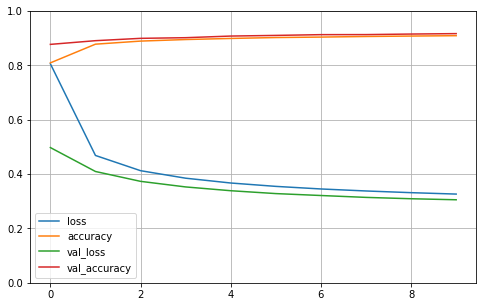

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(Sequential_model_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Sequential Model 2 - Model with single hidden layer

In [9]:
model2 = Sequential()
model2.add(Flatten(input_shape=[28, 28]))
            
model2.add(Dense(16, activation="sigmoid"))           ##Hidden layer

model2.add(Dense(10, activation="softmax"))          #Output layer

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


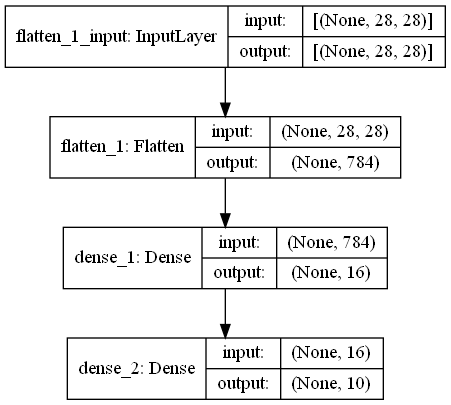

In [10]:
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)  #sequential model diagram

In [11]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
Sequential_model_2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 1s 572us/step - loss: 2.0679 - accuracy: 0.4047 - val_loss: 1.3990 - val_accuracy: 0.7280
Epoch 2/20
1719/1719 [==============================] - 1s 498us/step - loss: 1.2661 - accuracy: 0.7450 - val_loss: 0.9276 - val_accuracy: 0.8176
Epoch 3/20
1719/1719 [==============================] - 1s 480us/step - loss: 0.8779 - accuracy: 0.8241 - val_loss: 0.7126 - val_accuracy: 0.8564
Epoch 4/20
1719/1719 [==============================] - 1s 484us/step - loss: 0.6968 - accuracy: 0.8546 - val_loss: 0.5944 - val_accuracy: 0.8750
Epoch 5/20
1719/1719 [==============================] - 1s 499us/step - loss: 0.5993 - accuracy: 0.8664 - val_loss: 0.5190 - val_accuracy: 0.8878
Epoch 6/20
1719/1719 [==============================] - 1s 535us/step - loss: 0.5270 - accuracy: 0.8779 - val_loss: 0.4676 - val_accuracy: 0.8926
Epoch 7/20
1719/1719 [==============================] - 1s 489us/step - loss: 0.4845 - accuracy: 0.8839 - val_loss: 0.4301 -

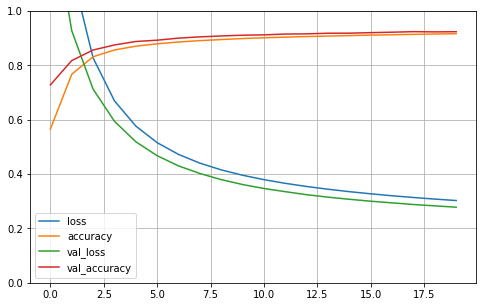

In [12]:
pd.DataFrame(Sequential_model_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Sequential Model 3 - Deep Model

In [13]:
model3 = Sequential()
model3.add(Flatten(input_shape=[28, 28]))

model3.add(Dense(256, activation="relu"))
model3.add(Dense(128, activation="relu"))
model3.add(Dense(96, activation="relu"))
model3.add(Dense(64, activation="relu"))          ##Hidden layers 
model3.add(Dense(32, activation="relu"))
model3.add(Dense(16, activation="relu"))

model3.add(Dense(10, activation="softmax"))     #output layer

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

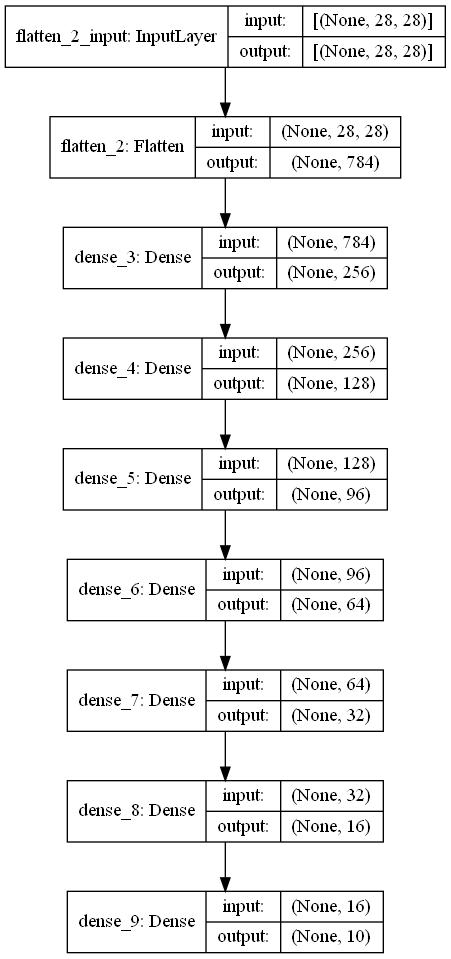

In [14]:
plot_model(model3, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)   #sequential model diagram

In [15]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
Sequential_model_3 = model3.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 961us/step - loss: 1.3942 - accuracy: 0.5272 - val_loss: 0.3147 - val_accuracy: 0.9062
Epoch 2/20
1719/1719 [==============================] - 1s 807us/step - loss: 0.2681 - accuracy: 0.9219 - val_loss: 0.2022 - val_accuracy: 0.9438
Epoch 3/20
1719/1719 [==============================] - 1s 830us/step - loss: 0.1792 - accuracy: 0.9478 - val_loss: 0.1654 - val_accuracy: 0.9524
Epoch 4/20
1719/1719 [==============================] - 1s 858us/step - loss: 0.1359 - accuracy: 0.9600 - val_loss: 0.1250 - val_accuracy: 0.9650
Epoch 5/20
1719/1719 [==============================] - 1s 860us/step - loss: 0.1018 - accuracy: 0.9690 - val_loss: 0.1081 - val_accuracy: 0.9692
Epoch 6/20
1719/1719 [==============================] - 1s 858us/step - loss: 0.0803 - accuracy: 0.9765 - val_loss: 0.1028 - val_accuracy: 0.9700
Epoch 7/20
1719/1719 [==============================] - 1s 818us/step - loss: 0.0758 - accuracy: 0.9780 - val_loss: 0.0878 -

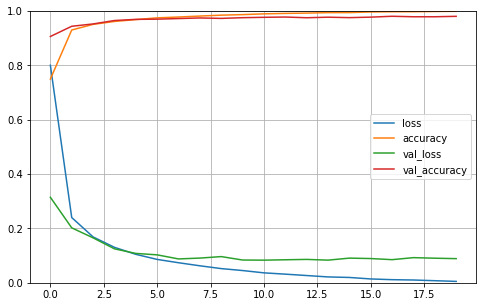

In [16]:
pd.DataFrame(Sequential_model_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Functional: Complex Deep Model

In [17]:
from tensorflow.keras.layers import Input           
from tensorflow.keras.layers import Reshape 
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model

In [18]:
input_ = Input(shape=[28, 28])                           #input layer
flatten = Flatten(input_shape=[28, 28])(input_)          #flattening the input


hidden1_left = Dense(256, activation="relu")(flatten)   
hidden2_left = Dense(128, activation='relu')(hidden1_left)    #Left branch
hidden3_left = Dense(64, activation='relu')(hidden2_left)    
hidden4_left = Dense(32, activation='relu')(hidden3_left)

hidden1_right = Dense(256, activation="sigmoid")(flatten)       
hidden2_right = Dense(128, activation='sigmoid')(hidden1_right)   #right branch 
hidden3_right = Dense(32, activation='sigmoid')(hidden2_right)

concat= Concatenate()([hidden4_left, hidden3_right])    # concatenating two branches into one

hidden_combined_1 = Dense(24, activation='relu')(concat)
hidden_combined_2 = Dense(16, activation='relu')(hidden_combined_1)



output = Dense(10, activation='softmax')(hidden_combined_2)

model = Model(inputs=[input_], outputs=[output] )
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 256)          200960      flatten_3[0][0]                  
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 128)          32896       dense_10[0][0]                   
______________________________________________________________________________________________

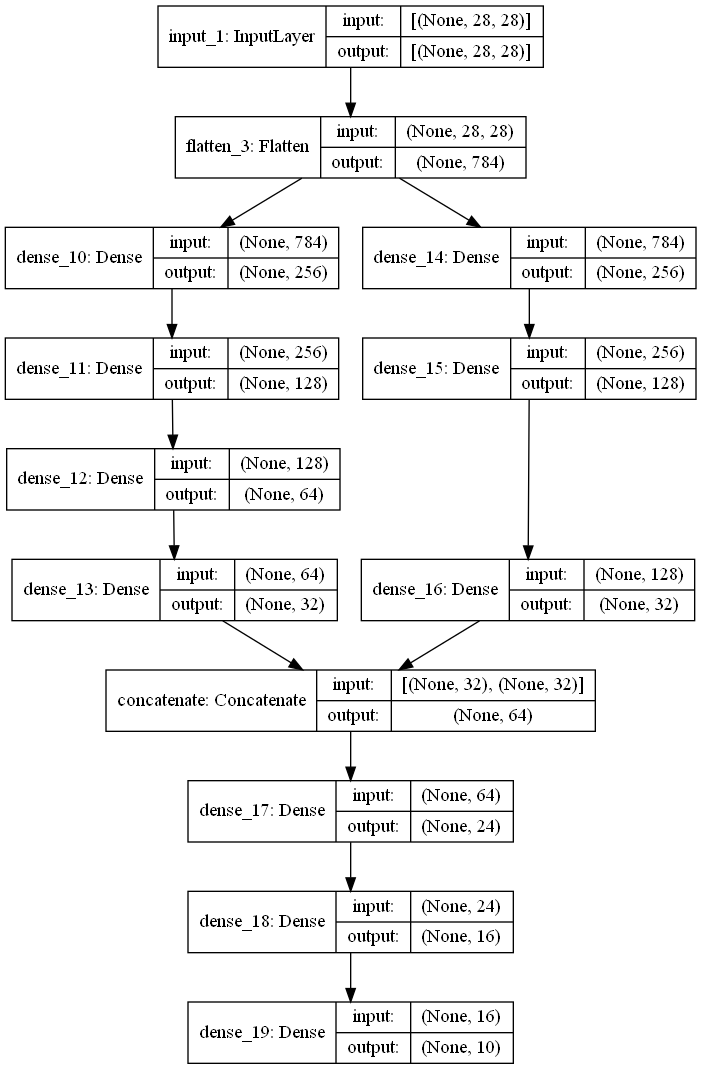

In [19]:
plot_model(model, to_file='model4_plot.png', show_shapes=True, show_layer_names=True)  #functional model diagram

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
Functional_Complex_Deep_Model = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 2s 1ms/step - loss: 1.6206 - accuracy: 0.4529 - val_loss: 0.3765 - val_accuracy: 0.8966
Epoch 2/25
1719/1719 [==============================] - 2s 960us/step - loss: 0.3457 - accuracy: 0.9020 - val_loss: 0.2217 - val_accuracy: 0.9386
Epoch 3/25
1719/1719 [==============================] - 2s 914us/step - loss: 0.2143 - accuracy: 0.9376 - val_loss: 0.1684 - val_accuracy: 0.9512
Epoch 4/25
1719/1719 [==============================] - 2s 951us/step - loss: 0.1526 - accuracy: 0.9570 - val_loss: 0.1305 - val_accuracy: 0.9630
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1174 - accuracy: 0.9649 - val_loss: 0.1152 - val_accuracy: 0.9666
Epoch 6/25
1719/1719 [==============================] - 2s 934us/step - loss: 0.0954 - accuracy: 0.9720 - val_loss: 0.1061 - val_accuracy: 0.9674
Epoch 7/25
1719/1719 [==============================] - 2s 974us/step - loss: 0.0772 - accuracy: 0.9771 - val_loss: 0.0974 - val

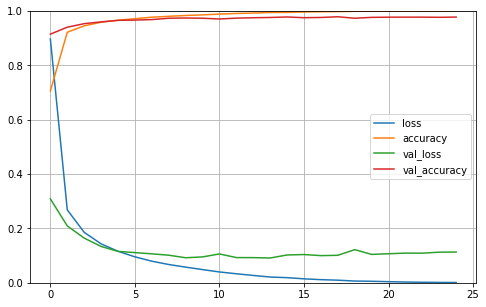

In [21]:
pd.DataFrame(Functional_Complex_Deep_Model.history).plot(figsize=(8, 5))
plt.grid(True)                                                      
plt.gca().set_ylim(0, 1) 
plt.show()